In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.options.display.max_columns = 21
pd.options.display.precision = 2
# disable scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [3]:
card_values = np.array([1,2,3,4,5,6,7,8,9,10,10,10,10])

In [70]:
HIT = 0
STAND = 1
DOUBLE = 2
SURRENDER = 4

In [5]:
def proba_hit(card):
	return 1/13

In [6]:
def proba_win_if_hit_dealer(player_score, dealer_score):
	sum_proba = 0
	for card in card_values:
		if card + dealer_score > player_score and card + dealer_score <= 21:
			sum_proba += proba_hit(card)
	return sum_proba

In [7]:
def proba_burst(score):
	sum_proba = 0
	for card in card_values:
		if card + score > 21:
			sum_proba += proba_hit(card)
	return sum_proba

In [8]:
def proba_hit_list(score):
	# return a list of tuple (new_score, proba)
	proba_list = []
	for card in card_values:
		new_score = score + card
		if new_score <= 21:
			proba_list.append((new_score, proba_hit(card)))
	return proba_list

In [9]:
def getGainMatrixDealerFromPolicy(policy):
	M = np.zeros((21,21))
	for sp in range(1, 22):
		for sd in range(21,0,-1):
			action = policy(sp,sd)
			if action == HIT:
				proba_hit_list_sd = proba_hit_list(sd)
				for proba_hit_sd in proba_hit_list_sd:
					new_sd, proba_sd = proba_hit_sd
					M[sp - 1, sd - 1] += proba_sd * M[sp - 1, new_sd - 1]
				M[sp - 1, sd - 1] += proba_burst(sd) * -1
			elif action == STAND:
				if sd > sp:
					M[sp - 1, sd - 1] = 1
				elif sd < sp:
					M[sp - 1, sd - 1] = -1
				else:
					M[sp - 1, sd - 1] = 0
	return M

In [10]:
def optimal_policy(sp, sd):
	if sd < sp:
		return HIT
	elif sd > sp:
		return STAND
	else:
		p = proba_win_if_hit_dealer(sd, sd)
		if p > 0.5:
			return HIT
		else:
			return STAND

In [11]:
def stand_on_17(sp, sd):
	if sd >= 17:
		return STAND
	else:
		return HIT

In [12]:
M_dealer = getGainMatrixDealerFromPolicy(stand_on_17)
df = pd.DataFrame(M_dealer, columns=range(1,22), index=range(1,22))
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
1,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
2,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
3,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
4,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
5,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
6,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
7,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
8,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
9,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
10,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00


In [13]:
def getPlayerOptimalPolicy(dealer_gain_matrix):
	policy = np.zeros((21,10))
	M = np.zeros((21,10))
	for sp in range(21, 0, -1):
		for sd in range(10,0,-1):
			score_hit = 0
			proba_hit_list_sp = proba_hit_list(sp)
			for proba_hit_sp in proba_hit_list_sp:
				new_sp, proba_sp = proba_hit_sp
				score_hit += proba_sp * M[new_sp - 1, sd - 1]
			score_hit += proba_burst(sp) * -1
			score_stand = -dealer_gain_matrix[sp-1, sd-1]
			if sd == 21:
				print(score_hit, score_stand, len(proba_hit_list_sp))
			M[sp - 1, sd - 1] = max(score_hit, score_stand)
			if score_hit > score_stand:
				policy[sp - 1, sd - 1] = HIT
			else:
				policy[sp - 1, sd - 1] = STAND
	return policy

In [14]:
def getGainMatrixPlayerOptimalPolicy(dealer_gain_matrix):
	M = np.zeros((21,10))
	for sp in range(21, 0, -1):
		for sd in range(10,0,-1):
			score_hit = 0
			proba_hit_list_sp = proba_hit_list(sp)
			for proba_hit_sp in proba_hit_list_sp:
				new_sp, proba_sp = proba_hit_sp
				score_hit += proba_sp * M[new_sp - 1, sd - 1]
			score_hit += proba_burst(sp) * -1
			score_stand = -dealer_gain_matrix[sp-1, sd-1]
			if sd == 21:
				print(score_hit, score_stand, len(proba_hit_list_sp))
			M[sp - 1, sd - 1] = max(score_hit, score_stand)
	return M

In [15]:
M_player = getGainMatrixPlayerOptimalPolicy(M_dealer)
df = pd.DataFrame(M_player, index=range(1,22), columns=range(1,11))
df

,1,2,3,4,5,6,7,8,9,10
1,-0.07,0.05,0.08,0.10,0.13,0.16,0.07,0.01,-0.07,-0.16
2,-0.19,-0.08,-0.05,-0.02,0.01,0.05,-0.05,-0.12,-0.20,-0.28
3,-0.21,-0.09,-0.06,-0.03,0.00,0.04,-0.08,-0.14,-0.22,-0.30
4,-0.23,-0.11,-0.08,-0.04,-0.01,0.03,-0.11,-0.17,-0.24,-0.32
5,-0.24,-0.12,-0.09,-0.05,-0.02,0.02,-0.14,-0.20,-0.27,-0.34
6,-0.25,-0.13,-0.09,-0.06,-0.03,0.01,-0.17,-0.22,-0.29,-0.37
7,-0.22,-0.10,-0.07,-0.03,0.00,0.03,-0.08,-0.21,-0.27,-0.34
8,-0.14,-0.02,0.01,0.04,0.07,0.10,0.06,-0.07,-0.21,-0.28
9,-0.06,0.07,0.09,0.12,0.15,0.18,0.13,0.08,-0.06,-0.21
10,0.04,0.16,0.18,0.21,0.23,0.26,0.21,0.16,0.09,-0.05


In [16]:
# card_values_prob = np.array([4,4,4,4,4,4,4,4,4,16])

# # Compute the prbability of having two cards which sums up to i for i in range 2 to 21
# def compute_proba_two_cards_sum():
#     proba = np.zeros(21)
#     for i in range(2, 12):
#         proba[i] = card_values_prob[i-2] / 52 * card_values_prob[i-2] / 51
#     for i in range(12, 22):
#         proba[i] = card_values_prob[21-i] / 52 * card_values_prob[i-12] / 51
#     return proba

# print(compute_proba_two_cards_sum())

# def compute_player_global_gain(M_player):
#     gain = 0
#     for sp in range(21):
#         for sd in range(10):
#             gain += M_player[sp, sd]
#     return gain

In [17]:
def compute_player_global_gain(M_player):
	esperance = 0
	for card_1_p in card_values:
		for card_2_p in card_values:
			for card_1_d in card_values:
				esperance += M_player[card_1_p + card_2_p - 1, card_1_d - 1] * 1/(13**3)
	return esperance

compute_player_global_gain(M_player)

-0.05742685600484616

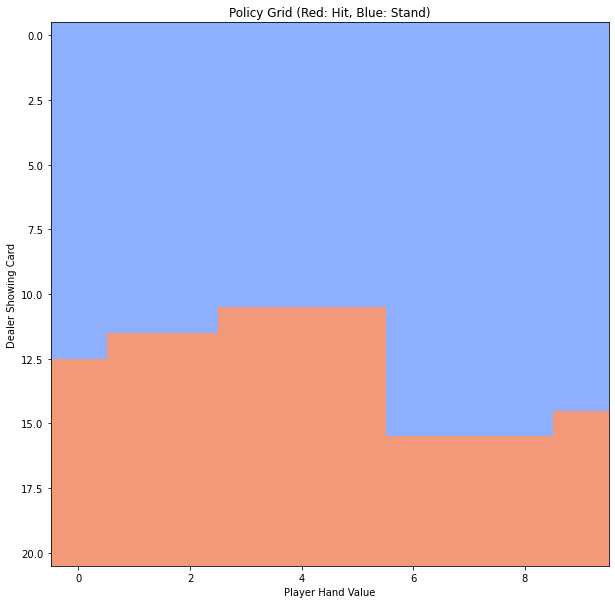

In [18]:
policy = getPlayerOptimalPolicy(M_dealer)
plt.figure(figsize=(10, 10))
plt.imshow(policy, cmap="coolwarm", aspect="auto")

plt.clim(-0.5, 1.5)
plt.xlabel("Player Hand Value")
plt.ylabel("Dealer Showing Card")
plt.title("Policy Grid (Red: Hit, Blue: Stand)")

plt.show()

In [19]:
def getPlayerOptimalPolicy(dealer_gain_matrix):
	policy = np.zeros((21,10))
	M = np.zeros((21,10))
	for sp in range(21, 0, -1):
		for sd in range(10,0,-1):
			score_hit = 0
			proba_hit_list_sp = proba_hit_list(sp)
			for proba_hit_sp in proba_hit_list_sp:
				new_sp, proba_sp = proba_hit_sp
				score_hit += proba_sp * M[new_sp - 1, sd - 1]
			score_hit += proba_burst(sp) * -1
			score_stand = -dealer_gain_matrix[sp-1, sd-1]
			if sd == 21:
				print(score_hit, score_stand, len(proba_hit_list_sp))
			M[sp - 1, sd - 1] = max(score_hit, score_stand)
			if score_hit > score_stand:
				policy[sp - 1, sd - 1] = HIT
			else:
				policy[sp - 1, sd - 1] = STAND
	return policy

### ACE / DOUBLE / SPLIT

In [20]:
cards = {}

In [21]:
def count_score(ace, two=0, three=0, four=0, five=0, six=0, seven=0, eight=0, nine=0, ten=0, jack=0, queen=0, king=0):
	score = 0
	score += 11*ace
	score += 2*two
	score += 3*three
	score += 4*four
	score += 5*five
	score += 6*six
	score += 7*seven
	score += 8*eight
	score += 9*nine
	score += 10*ten
	score += 10*jack
	score += 10*queen
	score += 10*king
	for _ in range(ace):
		if score > 21:
			score -= 10
		else:
			break
	return score

In [22]:
def count_score_min(ace, two=0, three=0, four=0, five=0, six=0, seven=0, eight=0, nine=0, ten=0, jack=0, queen=0, king=0):
	score = 0
	score += ace
	score += 2*two
	score += 3*three
	score += 4*four
	score += 5*five
	score += 6*six
	score += 7*seven
	score += 8*eight
	score += 9*nine
	score += 10*ten
	score += 10*jack
	score += 10*queen
	score += 10*king
	return score

In [23]:
def count_ace_used(ace, two=0, three=0, four=0, five=0, six=0, seven=0, eight=0, nine=0, ten=0, jack=0, queen=0, king=0):
	ace_used = 0
	score = 0
	score += 1*ace
	score += 2*two
	score += 3*three
	score += 4*four
	score += 5*five
	score += 6*six
	score += 7*seven
	score += 8*eight
	score += 9*nine
	score += 10*ten
	score += 10*jack
	score += 10*queen
	score += 10*king
	for _ in range(ace):
		if score <= 11:
			score += 10
			ace_used += 1
		else:
			break
	return ace_used

In [24]:
valid_hands_to_index = {}
index = 0
for ace in range(0, 22):
	score = count_score_min(ace)
	for two in range(0, (21 - score) // 2 + 1):
		score = count_score_min(ace, two)
		for three in range(0, (21 - score) // 3 + 1):
			score = count_score_min(ace, two, three)
			for four in range(0, (21 - score) // 4 + 1):
				score = count_score_min(ace, two, three, four)
				for five in range(0, (21 - score) // 5 + 1):
					score = count_score_min(ace, two, three, four, five)
					for six in range(0, (21 - score) // 6 + 1):
						score = count_score_min(ace, two, three, four, five, six)
						for seven in range(0, (21 - score) // 7 + 1):
							score = count_score_min(ace, two, three, four, five, six, seven)
							for eight in range(0, (21 - score) // 8 + 1):
								score = count_score_min(ace, two, three, four, five, six, seven, eight)
								for nine in range(0, (21 - score) // 9 + 1):
									score = count_score_min(ace, two, three, four, five, six, seven, eight, nine)
									for ten in range(0, (21 - score) // 10 + 1):
										score = count_score_min(ace, two, three, four, five, six, seven, eight, nine, ten)
										for jack in range(0, (21 - score) // 10 + 1):
											score = count_score_min(ace, two, three, four, five, six, seven, eight, nine, ten, jack)
											for queen in range(0, (21 - score) // 10 + 1):
												score = count_score_min(ace, two, three, four, five, six, seven, eight, nine, ten, jack, queen)
												for king in range(0, (21 - score) // 10 + 1):
													score = count_score_min(ace, two, three, four, five, six, seven, eight, nine, ten, jack, queen, king)
													if score <= 21:
														valid_hands_to_index[(ace, two, three, four, five, six, seven, eight, nine, ten, jack, queen, king)] = index
														index += 1

In [25]:
def create_hand(*args):
	l = [0]*13
	for i in args:
		l[i] += 1
	return tuple(l)

In [26]:
len(valid_hands_to_index)

3677

In [27]:
def check_blackjack(hand, score=None):
	score = score if score is not None else count_score(*hand)
	if sum(hand) == 2 and score == 21:
		return True
	return False

In [28]:
def resolve_hand_dealer(dealer_hand, player_hand):
	sd = count_score(*dealer_hand)
	sp = count_score(*player_hand)
	bjd = check_blackjack(dealer_hand, sd)
	bjp = check_blackjack(player_hand, sp)
	if bjd and bjp:
		return 0
	elif bjd:
		return 1
	elif bjp:
		return -1.5
	if sp > sd:
		return -1
	elif sp < sd:
		return 1
	else:
		return 0

In [29]:
valid_index_to_hands = [0] * len(valid_hands_to_index)
for hand, index in valid_hands_to_index.items():
	valid_index_to_hands[index] = hand

In [30]:
def proba_hit_list(hand):
	# return a list of tuple (new_score, proba)
	proba_list = []
	for card in range(13):
		new_hand = list(hand)
		new_hand[card] += 1
		new_hand = tuple(new_hand)
		if new_hand in valid_hands_to_index:
			proba_list.append((new_hand, proba_hit(card)))
	return proba_list

In [31]:
def proba_burst(hand):
	sum_proba = 0
	for card in range(13):
		new_hand = list(hand)
		new_hand[card] += 1
		new_hand = tuple(new_hand)
		if new_hand not in valid_hands_to_index:
			sum_proba += proba_hit(card)
	return sum_proba

In [32]:
def getGainMatrixDealerOptimalPolicy():
	M = np.zeros((len(valid_index_to_hands),len(valid_index_to_hands)))
	for hand_player_index in range(0, len(valid_index_to_hands)):
		for hand_dealer_index in range(len(valid_index_to_hands)-1,-1,-1):
			score_hit = 0
			hand = valid_index_to_hands[hand_dealer_index]
			for new_hand, proba in proba_hit_list(hand):
				score_hit += proba * M[hand_player_index, valid_hands_to_index[new_hand]]
			score_hit -= proba_burst(hand)
			player_hand = valid_index_to_hands[hand_player_index]
			score_stand = resolve_hand_dealer(hand, player_hand)
			if score_stand == -1.5 and sum(player_hand) > 1:
				M[hand_player_index, hand_dealer_index] = -1.5
			else:
				M[hand_player_index, hand_dealer_index] = max(score_hit, score_stand)
	return M

In [33]:
def getGainMatrixDealerPolicy(policy):
	M = np.zeros((len(valid_index_to_hands),len(valid_index_to_hands)))
	for hand_player_index in range(0, len(valid_index_to_hands)):
		for hand_dealer_index in range(len(valid_index_to_hands)-1,-1,-1):
			hand = valid_index_to_hands[hand_dealer_index]
			action = policy(valid_index_to_hands[hand_player_index], hand)
			if action == HIT:
				for new_hand, proba in proba_hit_list(hand):
					M[hand_player_index, hand_dealer_index] += proba * M[hand_player_index, valid_hands_to_index[new_hand]]
				M[hand_player_index, hand_dealer_index] -= proba_burst(hand)
			elif action == STAND:
				player_hand = valid_index_to_hands[hand_player_index]
				M[hand_player_index, hand_dealer_index] = resolve_hand_dealer(hand, player_hand)
	return M

In [34]:
M_dealer = getGainMatrixDealerOptimalPolicy()

In [35]:
def stand_on_17(player_hand, dealer_hand):
	if count_score(*dealer_hand) >= 17:
		return STAND
	else:
		return HIT

In [36]:
def stand_on_17_soft(player_hand, dealer_hand):
	score = count_score(*dealer_hand)
	if score > 17:
		return STAND
	elif score == 17:
		if count_ace_used(*dealer_hand) == 0:
			return STAND
		else:
			return HIT
	else:
		return HIT

In [37]:
M_dealer_17 = getGainMatrixDealerPolicy(stand_on_17)

In [38]:
M_dealer_17_soft = getGainMatrixDealerPolicy(stand_on_17_soft)

In [130]:
def updateOptimalPolicyDouble(dealer_gain_matrix, player_gain_matrix, optimal_policy):
	for card_1 in range(0, 13):
		for card_2 in range(0, 13):
			for card_dealer in range(0, 13):
				hand_player = create_hand(card_1, card_2)
				hand_dealer = create_hand(card_dealer)
				score_double = 0
				for new_hand, proba in proba_hit_list(hand_player):
					score_double += 2 * proba * -dealer_gain_matrix[valid_hands_to_index[new_hand], valid_hands_to_index[hand_dealer]]
				score_double -= proba_burst(hand_player) * 2
				if score_double >= player_gain_matrix[valid_hands_to_index[hand_player], card_dealer]:
					player_gain_matrix[valid_hands_to_index[hand_player], card_dealer] = score_double
					optimal_policy[valid_hands_to_index[hand_player], card_dealer] = DOUBLE

In [131]:
def updateOptimalPolicySurrender(player_gain_matrix, optimal_policy):
	for i in range(player_gain_matrix.shape[0]):
		for j in range(player_gain_matrix.shape[1]):
			if player_gain_matrix[i, j] < -0.5:
				player_gain_matrix[i, j] = -0.5
				optimal_policy[i, j] = SURRENDER

In [132]:
def getGainMatrixPlayerOptimalPolicy(dealer_gain_matrix):
	M = np.zeros((len(valid_index_to_hands),13))
	policy = np.zeros((len(valid_index_to_hands),13))
	for hand_player_index in range(len(valid_index_to_hands)-1, -1, -1):
		for card_dealer in range(0, 13):
			score_hit = 0
			l = [0] * 13
			l[card_dealer] = 1
			hand_dealer = tuple(l)
			hand = valid_index_to_hands[hand_player_index]
			proba_hit_list_sp = proba_hit_list(hand)
			for proba_hit_sp in proba_hit_list_sp:
				new_hand, proba_sp = proba_hit_sp
				score_hit += proba_sp * M[valid_hands_to_index[new_hand], card_dealer]
			score_hit -= proba_burst(hand)
			score_stand = -dealer_gain_matrix[hand_player_index, valid_hands_to_index[hand_dealer]]
			M[hand_player_index, card_dealer] = max(score_hit, score_stand)
			if score_hit > score_stand:
				policy[hand_player_index, card_dealer] = HIT
			else:
				policy[hand_player_index, card_dealer] = STAND
	updateOptimalPolicyDouble(dealer_gain_matrix, M, policy)
	# updateOptimalPolicySurrender(M, policy)
	return M, policy

In [133]:
def could_black_jack(hand):
	if sum(hand) == 1:
		if hand[0] == 1 or hand[9] == 1 or hand[10] == 1 or hand[11] == 1 or hand[12] == 1:
			return True
	if sum(hand) == 2 and count_score(*hand) == 21:
		return True
	return False

In [134]:
# for hand1, hand1_index in valid_hands_to_index.items():
# 	for hand2, hand2_index in valid_hands_to_index.items():
# 		score1 = count_score(*hand1)
# 		score2 = count_score(*hand2)
# 		if score1 == score2 and could_black_jack(hand1) == could_black_jack(hand2) \
# 			and count_ace_used(*hand1) == count_ace_used(*hand2):
# 			if not np.isclose(M_player[hand1_index, 0], M_player[hand2_index, 0]):
# 				print(hand1, hand2, score1, score2)
# 				print(M_player[hand1_index, 0], M_player[hand2_index, 0])
# 				print(optimal_policy[hand1_index, 0], optimal_policy[hand2_index, 0])
# 			assert M_player[hand1_index, 0] == M_player[hand2_index, 0]

In [135]:
M_player, optimal_policy = getGainMatrixPlayerOptimalPolicy(M_dealer_17)

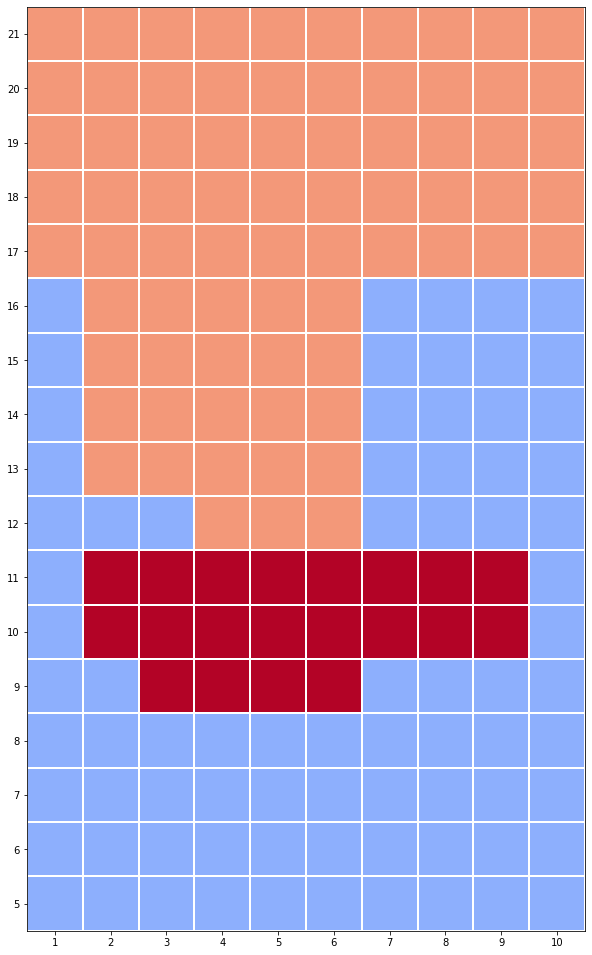

In [141]:
M_hard = np.zeros((17, 10))

for card_dealer in range(10):
	hand = create_hand(6, 6, 6)
	index = valid_hands_to_index[hand]
	M_hard[count_score(*hand) - 5, card_dealer] = optimal_policy[index, card_dealer]
	for card_1 in range(13):
		for card_2 in range(10):
			if card_1 != card_2 and card_1 != 0 and card_2 !=0:
				hand = create_hand(card_1, card_2)
				index = valid_hands_to_index[hand]
				M_hard[count_score(*hand) - 5, card_dealer] = optimal_policy[index, card_dealer]

plt.figure(figsize=(10, 17))
plt.imshow(M_hard, cmap="coolwarm", aspect="auto", origin="lower")
plt.clim(-.5, 1.5)

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 17))

# Labels for major ticks
ax.set_xticklabels(np.arange(1, 11, 1))
ax.set_yticklabels(np.arange(5, 22, 1))

# Minor ticks
ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-.5, 17, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# Remove minor ticks
ax.tick_params(which='minor', bottom=False, left=False)


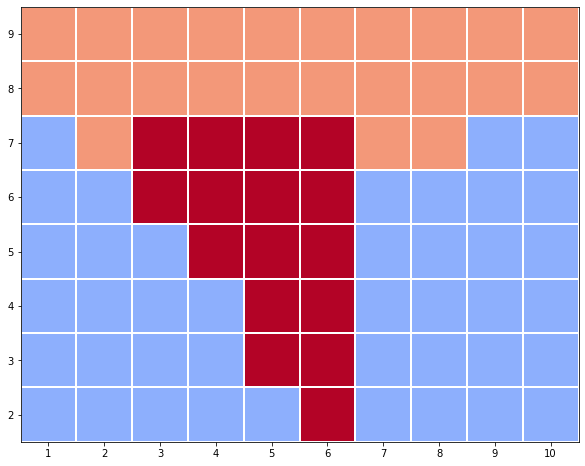

In [137]:
M_soft = np.zeros((8, 10))

for card_dealer in range(10):
	card_1 = 0
	for card_2 in range(1, 9):
		hand = create_hand(card_1, card_2)
		index = valid_hands_to_index[hand]
		M_soft[card_2-1, card_dealer] = optimal_policy[index, card_dealer]

plt.figure(figsize=(10, 8))
plt.imshow(M_soft, cmap="coolwarm", aspect="auto", origin="lower")
plt.clim(-0.5, 1.5)

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 8))

# Labels for major ticks
ax.set_xticklabels(np.arange(1, 11, 1))
ax.set_yticklabels(np.arange(2, 10, 1))

# Minor ticks
ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-.5, 8, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# Remove minor ticks
ax.tick_params(which='minor', bottom=False, left=False)


In [138]:
M_player, optimal_policy = getGainMatrixPlayerOptimalPolicy(M_dealer_17_soft)

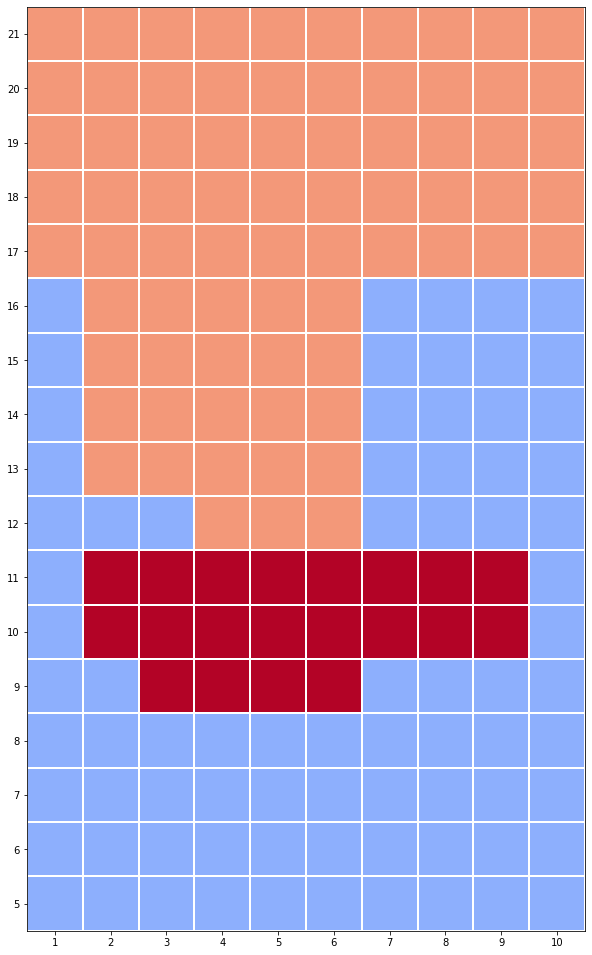

In [139]:
M_hard = np.zeros((17, 10))

for card_dealer in range(10):
	hand = create_hand(6, 6, 6)
	index = valid_hands_to_index[hand]
	M_hard[count_score(*hand) - 5, card_dealer] = optimal_policy[index, card_dealer]
	for card_1 in range(13):
		for card_2 in range(10):
			if card_1 != card_2 and card_1 != 0 and card_2 !=0:
				hand = create_hand(card_1, card_2)
				index = valid_hands_to_index[hand]
				M_hard[count_score(*hand) - 5, card_dealer] = optimal_policy[index, card_dealer]

plt.figure(figsize=(10, 17))
plt.imshow(M_hard, cmap="coolwarm", aspect="auto", origin="lower")
plt.clim(-0.5, 1.5)

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 17))

# Labels for major ticks
ax.set_xticklabels(np.arange(1, 11, 1))
ax.set_yticklabels(np.arange(5, 22, 1))

# Minor ticks
ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-.5, 17, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# Remove minor ticks
ax.tick_params(which='minor', bottom=False, left=False)


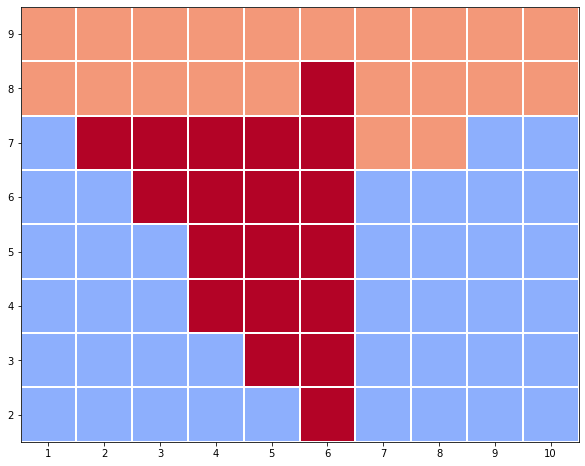

In [140]:
M_soft = np.zeros((8, 10))

for card_dealer in range(10):
	card_1 = 0
	for card_2 in range(1, 9):
		hand = create_hand(card_1, card_2)
		index = valid_hands_to_index[hand]
		M_soft[card_2-1, card_dealer] = optimal_policy[index, card_dealer]

plt.figure(figsize=(10, 8))
plt.imshow(M_soft, cmap="coolwarm", aspect="auto", origin="lower")
plt.clim(-0.5, 1.5)

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 8))

# Labels for major ticks
ax.set_xticklabels(np.arange(1, 11, 1))
ax.set_yticklabels(np.arange(2, 10, 1))

# Minor ticks
ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-.5, 8, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# Remove minor ticks
ax.tick_params(which='minor', bottom=False, left=False)
